In [1]:
import pandas as pd
import ydata_profiling
from pandas_profiling import ProfileReport
import numpy as np
import opendatasets as od
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

<ipython-input-1-afa0e182b667>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
train_df = train_df.drop(["Name", 'PassengerId'], axis=1)

In [7]:
#Creating new column, sum of all spending

train_df['Spending'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<AxesSubplot:xlabel='Spending'>

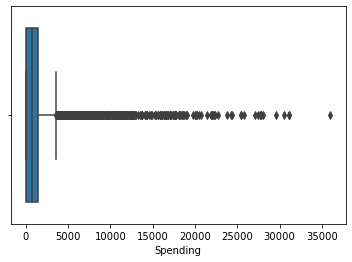

In [8]:
#Checking if there is any outliers

sns.boxplot(x='Spending', data=train_df)

<AxesSubplot:xlabel='Spending', ylabel='Age'>

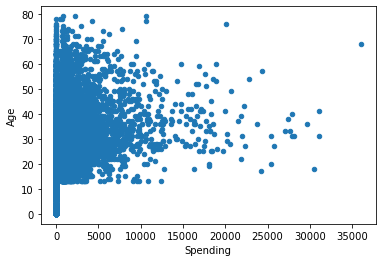

In [9]:
#Spending has many outliers, let's get rid of some of them

train_df.plot.scatter(x='Spending', y='Age')

In [10]:
#outliers higer than 2500 replace with 2500

train_df.loc[train_df.Spending.gt(25000), 'Spending'] = 25000

<AxesSubplot:xlabel='Spending'>

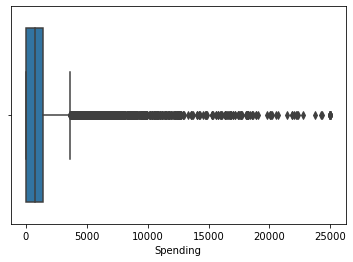

In [11]:
sns.boxplot(x='Spending', data=train_df)

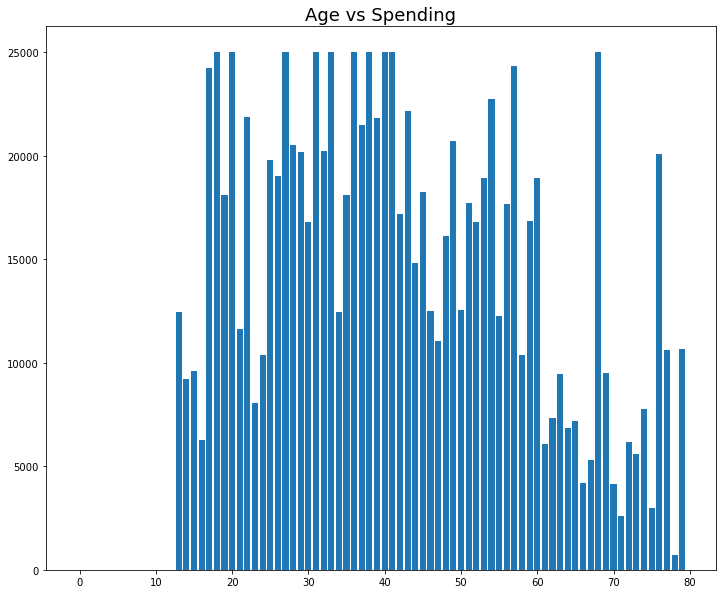

In [12]:
#Checking the distribution of age and money spent

fig, ax = plt.subplots(figsize = (12,10))
plt.title("Age vs Spending", fontsize = 18)
ax.bar(train_df.Age, train_df.Spending)
plt.show()

In [13]:
#As we see passengers under 13 did not spend money

#for those under 13 we can put 0 in the spending columns

train_df.loc[train_df.Age < 13,['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = 0


In [14]:
Spending_df = train_df[(train_df['Spending'] > 0 ) & (train_df['CryoSleep'] == True)]

if Spending_df.empty:
    print('Passnegers in CryoSleep do not spend money!')

Passnegers in CryoSleep do not spend money!


In [15]:
#for passengers in CryoSleep we can put 0 in the spending columns

train_df.loc[train_df.CryoSleep == True,['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = 0

In [16]:
#the rest of the NaNs we are filling with the median of awake adults

df_filtered = train_df.query('Age > 13') 
df_filtered = df_filtered.query('CryoSleep == True')

In [17]:
category=['RoomService',"FoodCourt","ShoppingMall","Spa","VRDeck"]
train_df.RoomService = train_df.RoomService.fillna(df_filtered.RoomService.median())
train_df.FoodCourt = train_df.FoodCourt.fillna(df_filtered.FoodCourt.median())
train_df.ShoppingMall = train_df.ShoppingMall.fillna(df_filtered.ShoppingMall.median())
train_df.Spa = train_df.Spa.fillna(df_filtered.Spa.median())
train_df.VRDeck = train_df.VRDeck.fillna(df_filtered.VRDeck.median())

In [18]:
#Similary, passengers who spend are not in CryoSleep

train_df.loc[train_df['Spending'] > 0, 'CryoSleep'] = train_df.CryoSleep.fillna(False)

In [19]:
#Let's assume that poeple older than 13 who do not spend money are in the CryoSleep 

train_df.loc[(train_df['Spending'] == 0) & (train_df['Age'] >13), 'CryoSleep'] = train_df.CryoSleep.fillna(True)

<AxesSubplot:title={'center':'Home Planet vs VIP'}, xlabel='HomePlanet', ylabel='count'>

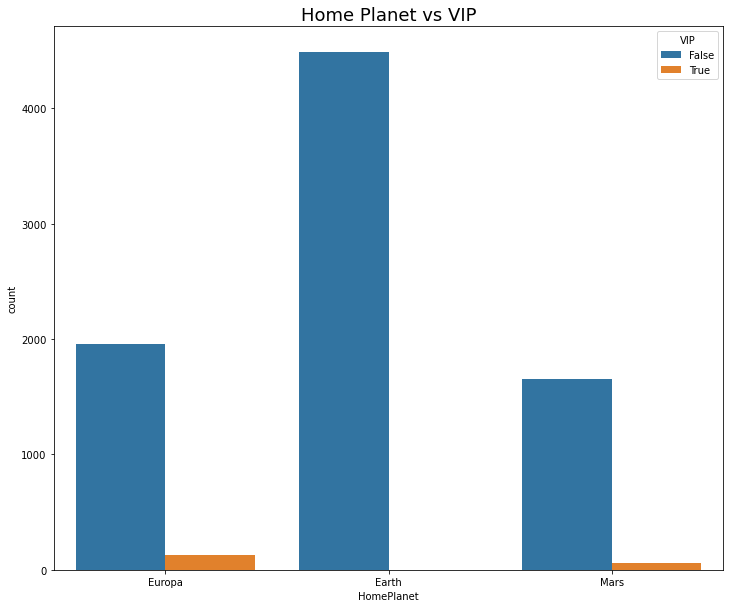

In [20]:
plt.figure(figsize = (12,10))
plt.title("Home Planet vs VIP", fontsize = 18)
sns.countplot(x='HomePlanet',hue="VIP", data=train_df)


In [21]:
#Passengers from Earth do not have VIP

train_df.loc[(train_df['HomePlanet'] == 'Earth'), 'VIP'] = train_df.VIP.fillna(False)

<AxesSubplot:title={'center':'Age vs VIP'}, xlabel='Age', ylabel='count'>

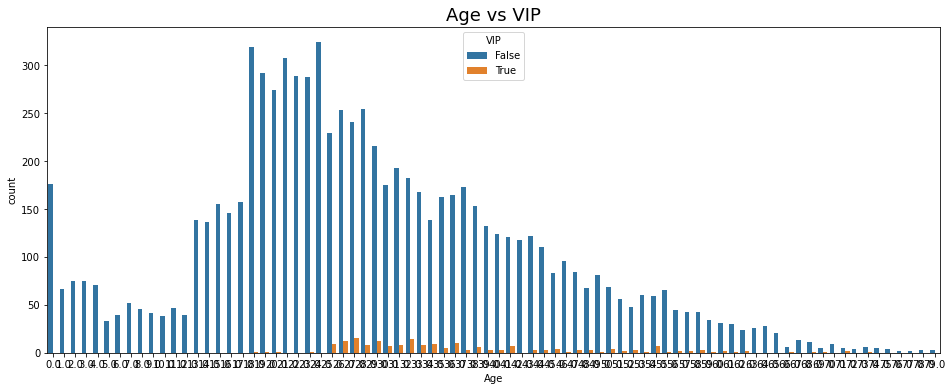

In [22]:
plt.figure(figsize = (16,6))
plt.title("Age vs VIP", fontsize = 18)
sns.countplot(x='Age',hue="VIP", data=train_df)


In [23]:
young_df = train_df[(train_df['Age'] <18 ) & (train_df['VIP'] == True)]

if young_df.empty:
    print('Passnegers under 18 are not VIP.')

Passnegers under 18 are not VIP.


In [24]:
#we can fill VIP with False for passengers under 18

train_df.loc[(train_df['Age'] <18), 'VIP'] = train_df.VIP.fillna(False)

In [25]:
#Let's check the value that appears most often in several column

mode_df = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for i in mode_df:
    print(f'Most frequent value in {i} is {train_df[i].mode()}')
    print('--------------------')

Most frequent value in HomePlanet is 0    Earth
dtype: object
--------------------
Most frequent value in CryoSleep is 0    False
dtype: object
--------------------
Most frequent value in Destination is 0    TRAPPIST-1e
dtype: object
--------------------
Most frequent value in VIP is 0    False
dtype: object
--------------------


In [26]:
#Let's fill NaN with most frequent value in categorical columns

for i in mode_df:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

In [27]:
#Let's check median age according to being VIP

train_df.groupby('VIP')['Age'].median()

VIP
False    27.0
True     34.0
Name: Age, dtype: float64

In [28]:
#filling nan in Age's column with calculated medians

train_df['Age'] = train_df['Age'].fillna(train_df.groupby('VIP')['Age'].transform('median'))

In [29]:
#filling missing value in column 'Cabin' basing on the corresponding value in the previous row

train_df['Cabin'] = train_df['Cabin'].ffill()

In [30]:
train_df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Spending        0
dtype: int64

In [31]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [32]:
#Let's clean the test data in the same way as train

passenger_id = test_df['PassengerId']

test_df = test_df.drop(["Name", 'PassengerId'], axis=1)
test_df['Spending'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test_df.loc[test_df.Age < 13,['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = 0
test_df.loc[test_df.CryoSleep == True,['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = 0
df_filt = test_df.query('Age > 13') 
df_filt = df_filt.query('CryoSleep == True')
category=['RoomService',"FoodCourt","ShoppingMall","Spa","VRDeck"]
test_df.RoomService = test_df.RoomService.fillna(df_filt.RoomService.median())
test_df.FoodCourt = test_df.FoodCourt.fillna(df_filt.FoodCourt.median())
test_df.ShoppingMall = test_df.ShoppingMall.fillna(df_filt.ShoppingMall.median())
test_df.Spa = test_df.Spa.fillna(df_filt.Spa.median())
test_df.VRDeck = test_df.VRDeck.fillna(df_filt.VRDeck.median())

test_df.loc[test_df['Spending'] > 0, 'CryoSleep'] = test_df.CryoSleep.fillna(False)
test_df.loc[(test_df['Spending'] == 0) & (test_df['Age'] >13), 'CryoSleep'] = test_df.CryoSleep.fillna(True)

test_df.loc[(test_df['HomePlanet'] == 'Earth'), 'VIP'] = test_df.VIP.fillna(False)
test_df.loc[(test_df['Age'] <16), 'VIP'] = test_df.VIP.fillna(False)

mode_df = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for i in mode_df:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
test_df['Age'] = test_df['Age'].fillna(test_df.groupby('VIP')['Age'].transform('median'))
test_df['Cabin'] = test_df['Cabin'].ffill()
test_df[['deck_cabin', 'num_cabin', 'side_cabin']] = test_df.Cabin.str.split("/", expand = True)
test_df = test_df.drop('Cabin', axis=1)
test_df = test_df.drop('Spending', axis=1)

In [33]:
test_df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
deck_cabin      0
num_cabin       0
side_cabin      0
dtype: int64

In [34]:
train_df = train_df.drop('Spending', axis=1)

In [35]:
#splitting Cabin column to enable encoding

train_df[['deck_cabin', 'num_cabin', 'side_cabin']] = train_df.Cabin.str.split("/", expand = True)
train_df = train_df.drop('Cabin', axis=1)
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck_cabin,num_cabin,side_cabin
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [36]:
#let's encode categorical value with numerical value

lbe = LabelEncoder()
categorical_vars = ["HomePlanet","CryoSleep","Destination","VIP","Transported", 'deck_cabin', 'side_cabin']
train_df[categorical_vars] = train_df[categorical_vars].apply(lbe.fit_transform)
test_df[["HomePlanet","CryoSleep","Destination","VIP", 'deck_cabin', 'side_cabin']] = test_df[["HomePlanet","CryoSleep","Destination","VIP", 'deck_cabin', 'side_cabin']].apply(lbe.fit_transform)

test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck_cabin,num_cabin,side_cabin
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,6,1496,1
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,6,1496,1
4274,2,1,0,26.0,0,0.0,0.0,0.0,0.0,0.0,3,296,0
4275,1,0,2,26.0,0,0.0,2680.0,0.0,0.0,523.0,3,297,0


In [37]:
train_df.to_csv('clean_data.csv',index=False)
test_df.to_csv('clean_test.csv', index = False)